In [1]:
*Create ST513 library;
LIBNAME ST513 '/folders/myfolders/ST513/project1';

*Import data into the ST513 library (from file, rather than URL)
G1 and G2 are imported as character variable, while G3 is imported as a numerical variable;
FILENAME REFFILE '/folders/myfolders/ST513/project1/StudentData.txt';

PROC IMPORT DATAFILE=REFFILE
	DBMS=DLM
	OUT=ST513.StudentData;
	DELIMITER=";";
	GETNAMES=YES;
RUN;

*Copy dataset with G1 and G2 recast as numeric values 
(numeric type expected from the description of the original data at https://archive.ics.uci.edu/ml/datasets/Student+Performance#);
DATA ST513.RecastStudentData;
  SET ST513.StudentData;
  numG1 = input(G1, 8.);
  numG2 = input(G2, 8.);
RUN;

SAS Connection established. Subprocess id is 9779



First, we can assess and visualize the distribution of males and females in the class. 

sex,Frequency,Percent,CumulativeFrequency,CumulativePercent
F,208,52.66,208,52.66
M,187,47.34,395,100.00

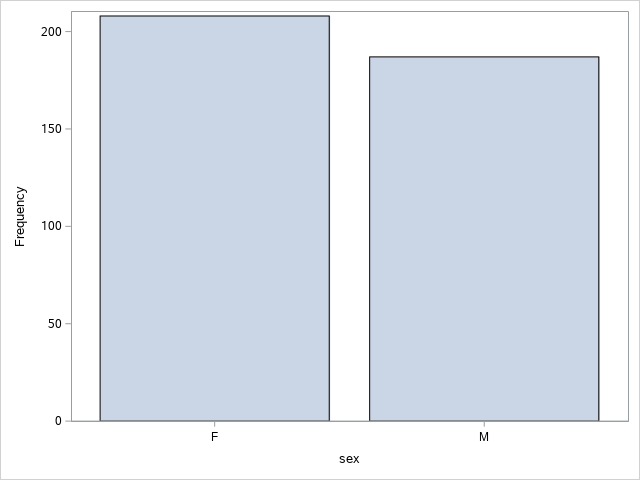

In [5]:
PROC SGPLOT DATA = ST513.RecastStudentData;
  VBAR sex;
RUN;

PROC FREQ DATA = ST513.RecastStudentData;
  TABLES sex;
RUN;

In [ ]:
The gender split is fairly even. Females exceed males by a count of 21, or 5.32%. Next, we can assess whether the final grade distribution (G3) differs between females and males. 


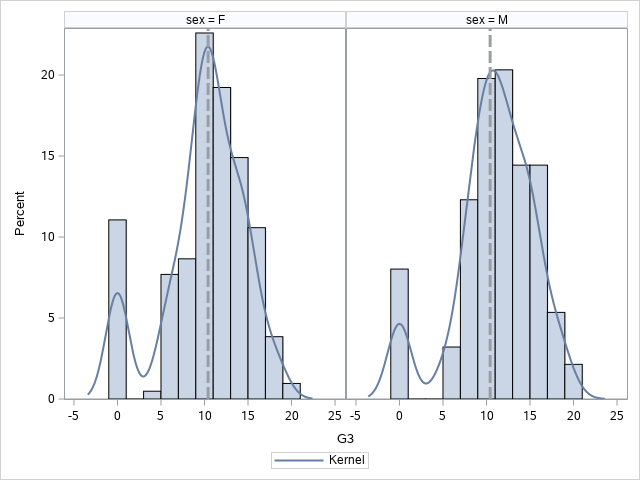

In [6]:
*Histogram with a smoothed overlay - gender and final grades;
PROC SGPANEL DATA = ST513.RecastStudentData;
  PANELBY sex;
  HISTOGRAM G3;
  DENSITY G3 / TYPE = kernel;
  REFLINE 10.42 / AXIS = x 
            LINEATTRS = (Pattern = 4 
                         Thickness = 3);
RUN;